## Skin Cancer (Melignant and Benign)

What Is a Tumor?
A tumor is an abnormal lump or growth of cells. When the cells in the tumor are normal, it is benign. Something just went wrong, and they overgrew and produced a lump. When the cells are abnormal and can grow uncontrollably, they are cancerous cells, and the tumor is malignant.

To determine whether a tumor is benign or cancerous, a doctor can take a sample of the cells with a biopsy procedure. Then the biopsy is analyzed under a microscope by a pathologist, a doctor specializing in laboratory science.

## Benign Tumors: Noncancerous

If the cells are not cancerous, the tumor is benign. It won't invade nearby tissues or spread to other areas of the body (metastasize). A benign tumor is less worrisome unless it is pressing on nearby tissues, nerves, or blood vessels and causing damage.1

﻿ Fibroids in the uterus or lipomas are examples of benign tumors.

Benign tumors may need to be removed by surgery.1﻿ They can grow very large, sometimes weighing pounds. They can be dangerous, such as when they occur in the brain and crowd the normal structures in the enclosed space of the skull. They can press on vital organs or block channels.


Some types of benign tumors such as intestinal polyps are considered precancerous and are removed to prevent them becoming malignant. Benign tumors usually don't recur once removed, but if they do it is usually in the same place.

## Malignant Tumors: Cancerous

Malignant means that the tumor is made of cancer cells, and it can invade nearby tissues. Some cancer cells can move into the bloodstream or lymph nodes, where they can spread to other tissues within the body—this is called metastasis.2﻿﻿ Cancer can occur anywhere in the body including the breast, intestines, lungs, reproductive organs, blood, and skin.


For example, breast cancer begins in the breast tissue and may spread to lymph nodes in the armpit if it's not caught early enough and treated. Once breast cancer has spread to the lymph nodes, the cancer cells can travel to other areas of the body, like the liver or bones.

The breast cancer cells can then form tumors in those locations. A biopsy of these tumors might show characteristics of the original breast cancer tumor.

## Adenomatous Polyps

Some types of benign tumors only very rarely transform into malignant tumors. But some types, such as adenomatous polyps (adenomas) in the colon have a greater risk of transforming into cancer.3﻿ That is why polyps, which are benign, are removed during colonoscopy. Removing them is one way of preventing colon cancer.

It's not always clear-cut whether a tumor is benign or malignant, and your doctor may use several different factors to diagnose it as one or the other. You may end up with an uncertain diagnosis.

Also, it is possible that a biopsy finds precancerous cells or misses the area where the cancerous cells are more prevalent. In these cases, what was thought to be benign might turn out to be malignant as it further grows and develops.

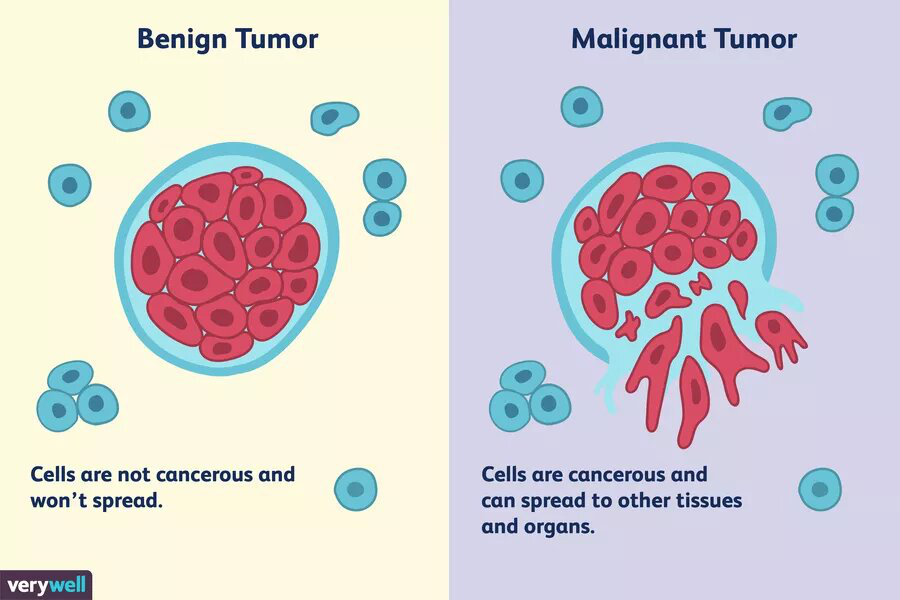

In [16]:
Image.open(r"C:\Users\Jeffery\Desktop\skin cancer.jpg")

## Description

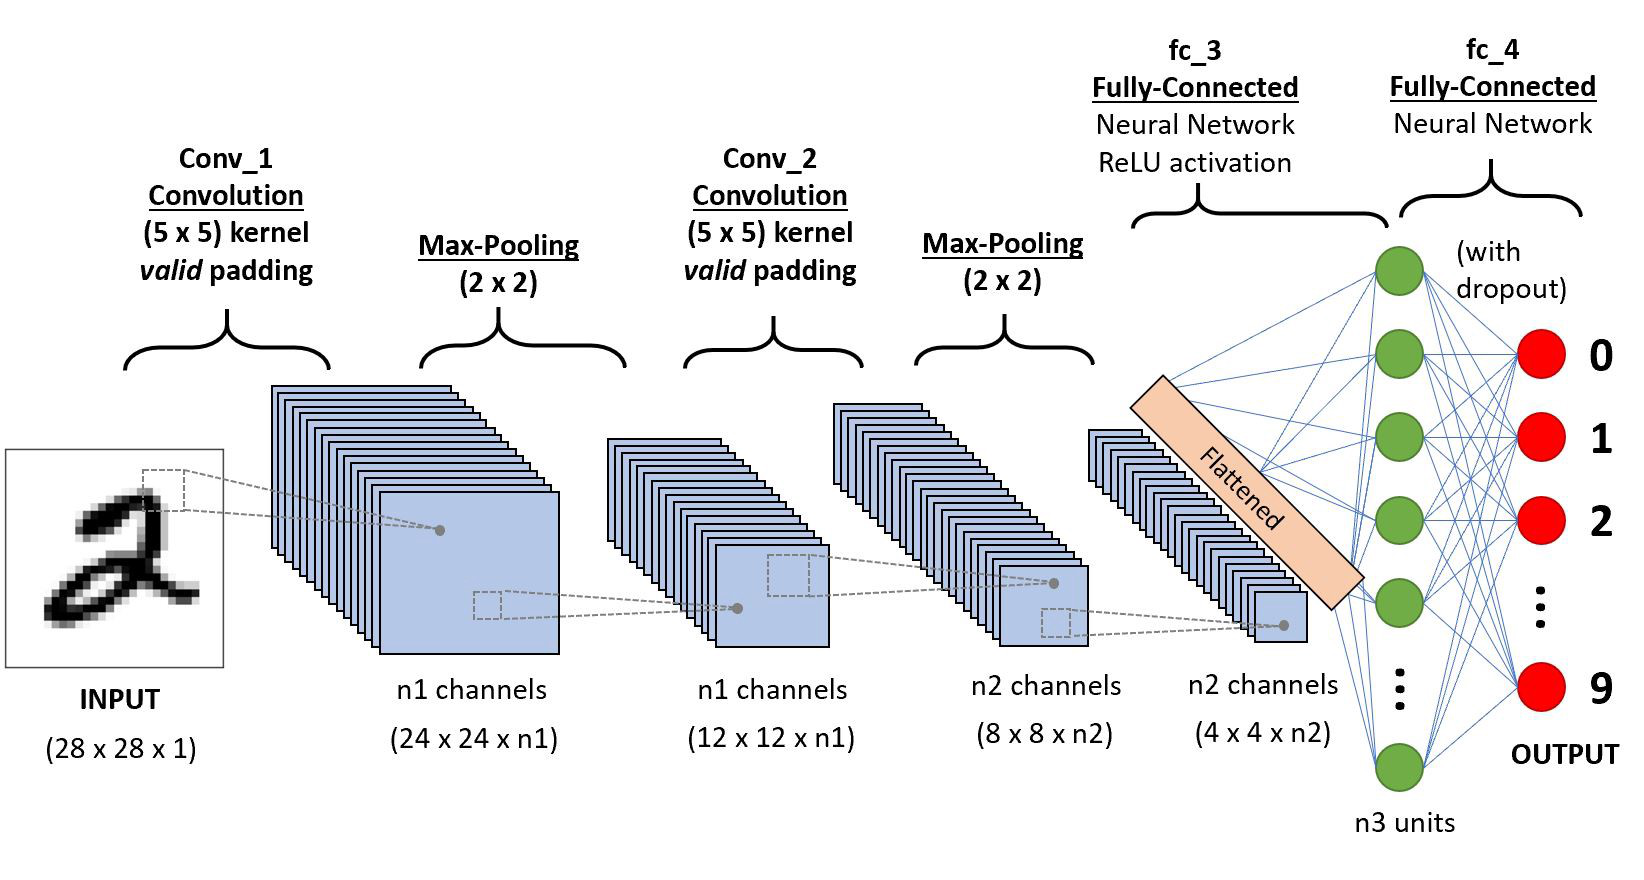

In [14]:
from PIL import Image
Image.open(r"C:\Users\Jeffery\Desktop\1_uAeANQIOQPqWZnnuH-VEyw.jpeg")

In [1]:
import tensorflow as tf
import keras as k
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from keras_preprocessing import image

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.activations import relu,sigmoid,tanh,softmax
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation,LeakyReLU
from keras.optimizers import RMSprop,Adagrad,Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2,l1,l1_l2

## CNN ARCHITECTURE 

In [15]:
model = Sequential()

model.add(Conv2D(64,(2,2),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Dense(128,kernel_regularizer=l2(0.01)))
model.add(Flatten())
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))
          
model.compile(loss ='binary_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 

In [16]:
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train.flow_from_directory(r"C:\Users\Jeffery\Desktop\archive (1)\train",
                                       target_size=(64,64),
                                       batch_size=32)
test_set=test.flow_from_directory(r"C:\Users\Jeffery\Desktop\archive (1)\test",
                                  target_size=(64,64),
                                  batch_size=32)

model_history=model.fit_generator(training_set,
                                  steps_per_epoch=1000,
                                  epochs=50,
                                  validation_data=test_set,
                                  validation_steps=800)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/50
1000/1000 [==============================] - 214s 214ms/step - loss: 0.7851 - accuracy: 0.7836 - val_loss: 0.2157 - val_accuracy: 0.8350
Epoch 2/50
1000/1000 [==============================] - 215s 215ms/step - loss: 0.3027 - accuracy: 0.8878 - val_loss: 0.2159 - val_accuracy: 0.8122
Epoch 3/50
1000/1000 [==============================] - 209s 209ms/step - loss: 0.2113 - accuracy: 0.9366 - val_loss: 0.2956 - val_accuracy: 0.8088
Epoch 4/50
1000/1000 [==============================] - 211s 211ms/step - loss: 0.1484 - accuracy: 0.9655 - val_loss: 0.7236 - val_accuracy: 0.8032
Epoch 5/50
1000/1000 [==============================] - 208s 208ms/step - loss: 0.1097 - accuracy: 0.9811 - val_loss: 0.6750 - val_accuracy: 0.7784
Epoch 6/50
1000/1000 [==============================] - 209s 209ms/step - loss: 0.0815 - accuracy: 0.9892 - val_loss: 1.3616 - val_accuracy: 0.7921
Epoch 7/50
1000/1000 [=======

In [10]:
training_set.class_indices

{'benign': 0, 'malignant': 1}

In [11]:
test_image=image.load_img(r"C:\Users\Jeffery\Desktop\archive (1)\test\malignant\3.jpg",
                          target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)

if result[0][0] == 1:
    print("Benign Skin Cancer")
if result[0][1]== 1:
    print("Malignant Skin Cancer")

Malignant Skin Cancer


In [12]:
result

array([[0., 1.]], dtype=float32)

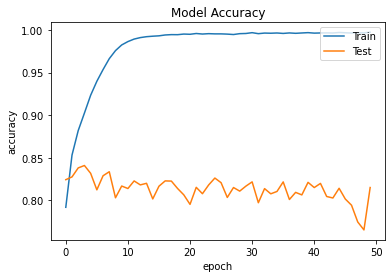

In [13]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

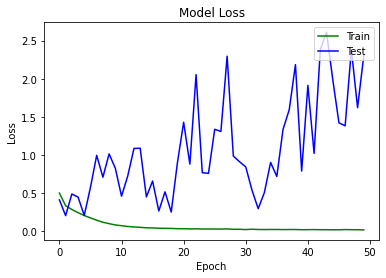

In [14]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model_history.history['loss'], color='green')
plt.plot(model_history.history['val_loss'], color='blue')
plt.legend(['Train', 'Test'], loc='upper right')
plt.title('Model Loss')
plt.show()

## Inference

this project may help the pateints in the beginning stage to know whether they have a melignant or a benign cancer .My cnn program will classify the patients either in anyone of the classifications based on the pictures they upload . this project gave a 100% Training Accuracy and 81% - 83% Test Accuracy 
